In [1]:
#import yfinance library
import yfinance as yf

#omport important python libraries
import pandas as pd
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#to format date
import matplotlib.dates as mdates
import holidays
import datetime
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay

#for RSI
import ta

#to import operating system module
import os

# Load Data

In [2]:
stock='NVDA'

In [3]:
#Select stocks to acesss from yfinance
ticker = yf.Tickers(stock)

stock_data= yf.download(stock, period='5y', interval='1d', auto_adjust=True)

stock_data = stock_data.swaplevel(axis=1).droplevel(level=0, axis=1)
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-06-01,8.773925,8.808298,8.657604,8.800826,389876000
2020-06-02,8.792854,8.804810,8.626219,8.763961,391320000
2020-06-03,8.737310,8.833706,8.668066,8.789867,365440000
2020-06-04,8.738307,8.914488,8.649593,8.699930,424280000
2020-06-05,8.891314,8.968066,8.679995,8.766217,481748000


In [4]:
#calculate data summary and dataframe shape
print ('\nDataFrame summary is:\n')
stock_data.info()

print ('\nDataFrame shape is:')
stock_data.shape


DataFrame summary is:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-06-01 to 2025-05-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB

DataFrame shape is:


(1257, 5)

In [5]:
#calculate summary statistics

print('Summay statistics is: \n')
stock_data.describe()

Summay statistics is: 



Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,47.854946,48.763067,46.862014,47.861697,4.238593e+08
std,43.348569,44.193172,42.457994,43.415275,1.794100e+08
min,8.737310,8.804810,8.626219,8.699930,9.788400e+07
25%,15.446794,15.756055,15.141415,15.434811,2.896800e+08
50%,25.023075,25.660809,24.236485,24.954136,4.022820e+08
75%,78.787415,80.046700,77.133032,79.064307,5.242820e+08
max,149.416245,153.115916,147.806407,153.015919,1.543911e+09


# Analysis Indicator

## Moving Average

In [6]:
#calculate moving average 

#window sizes for the moving averages
window_size = 5

stock_data['Moving_Average'] = stock_data['Close'].rolling(window=window_size).mean()


Plot is saved.



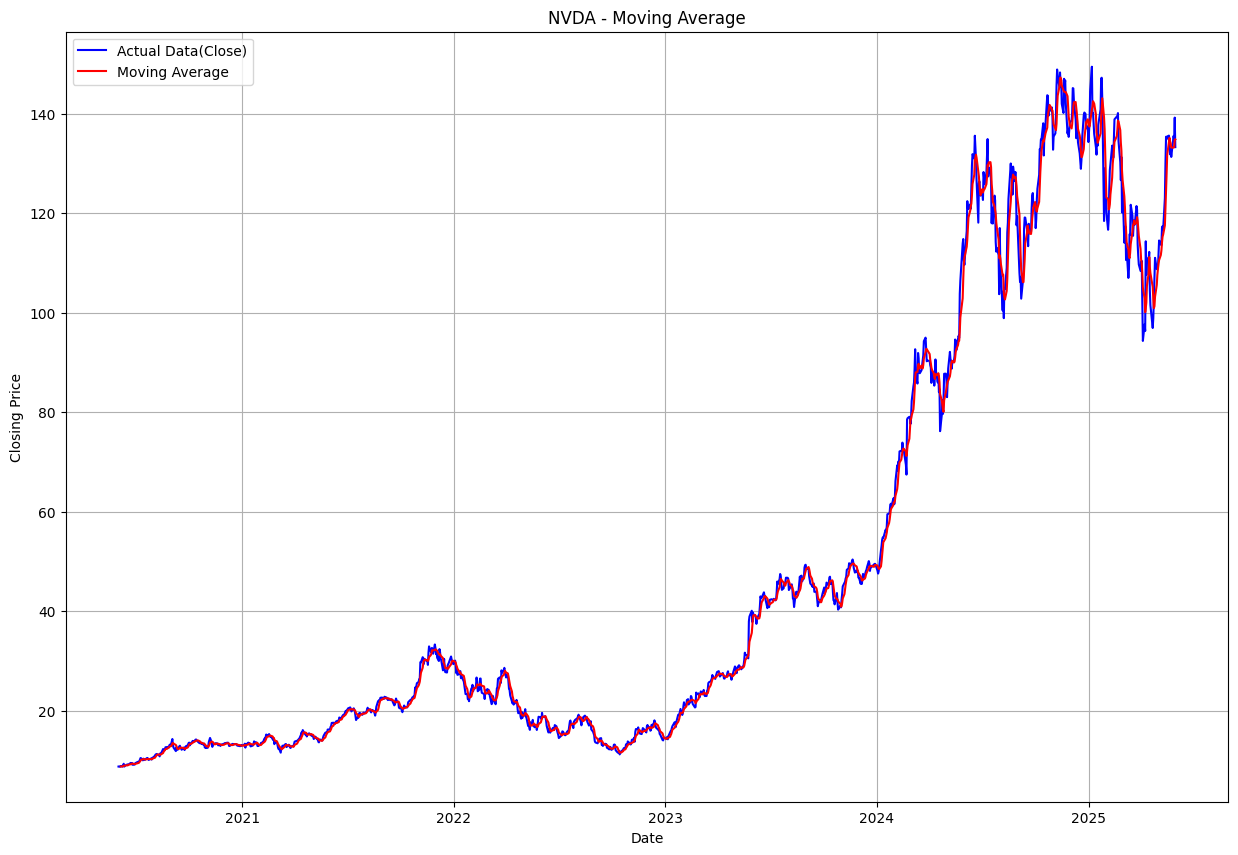

In [7]:
#plot and save moving average data with actual closing price data

plt.figure(figsize=(15, 10)) #create a figure
plt.plot(stock_data.index, stock_data['Close'].values, label='Actual Data(Close)', color='blue')
plt.plot(stock_data.index, stock_data['Moving_Average'].values, label='Moving Average', color='red')

#plot properties
plt.title(f'{stock} - Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

#select plot directory and plot name to save plot
plot_folder = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'plot images/historical price plot'

plot_name = f'{stock} - Moving Average.png'
plot_path = os.path.join(plot_folder, plot_name)

#create the directory if it doesn't exist
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

#save plot and display message
plt.savefig(plot_path)
print(f'\nPlot is saved.\n')

#show plot
plt.show()

#close the plot to free up memory
plt.close()

## RSI (Relative Strength Index)

In [8]:
#calculate RSI
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=5)


Plot is saved.



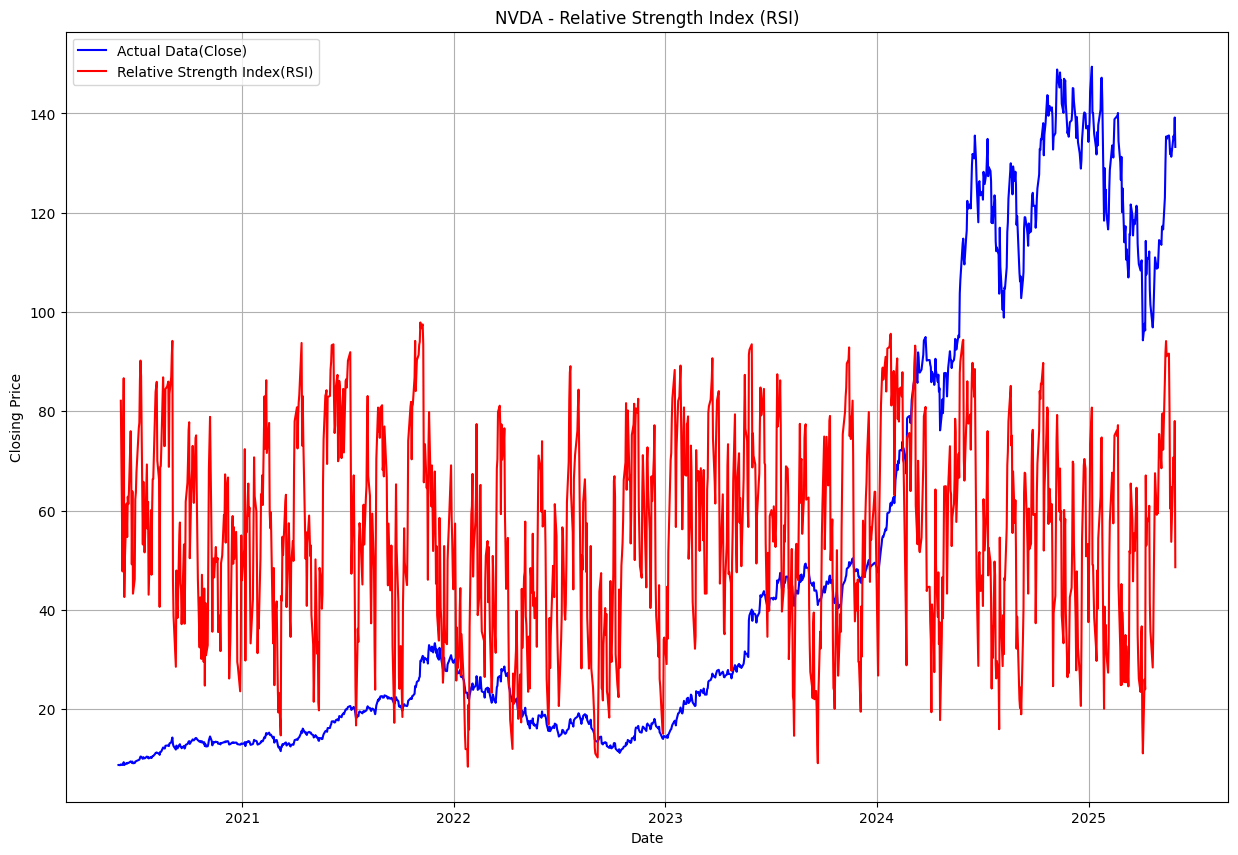

In [9]:
#plot and save RSI data with actual closing price data

plt.figure(figsize=(15, 10)) #create a figure
plt.plot(stock_data.index, stock_data['Close'].values, label='Actual Data(Close)', color='blue')
plt.plot(stock_data.index, stock_data['RSI'].values, label='Relative Strength Index(RSI)', color='red')

#plot properties
plt.title(f'{stock} - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

#select plot directory and plot name to save plot
plot_folder = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'plot images/historical price plot'

plot_name = f'{stock} - Relative Strength Index (RSI).png'
plot_path = os.path.join(plot_folder, plot_name)

#create the directory if it doesn't exist
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

#save plot and display message
plt.savefig(plot_path)
print(f'\nPlot is saved.\n')

#show plot
plt.show()

#close the plot to free up memory
plt.close()

## MACD (Moving Average Convergence Divergence)

In [10]:
#calculate MACD (Moving Average Convergence Divergence)
stock_data['MACD'] = ta.trend.macd(stock_data['Close'])
stock_data['MACD_Signal'] = ta.trend.macd_signal(stock_data['Close'])
stock_data['MACD_Diff'] = ta.trend.macd_diff(stock_data['Close'])


Plot is saved.



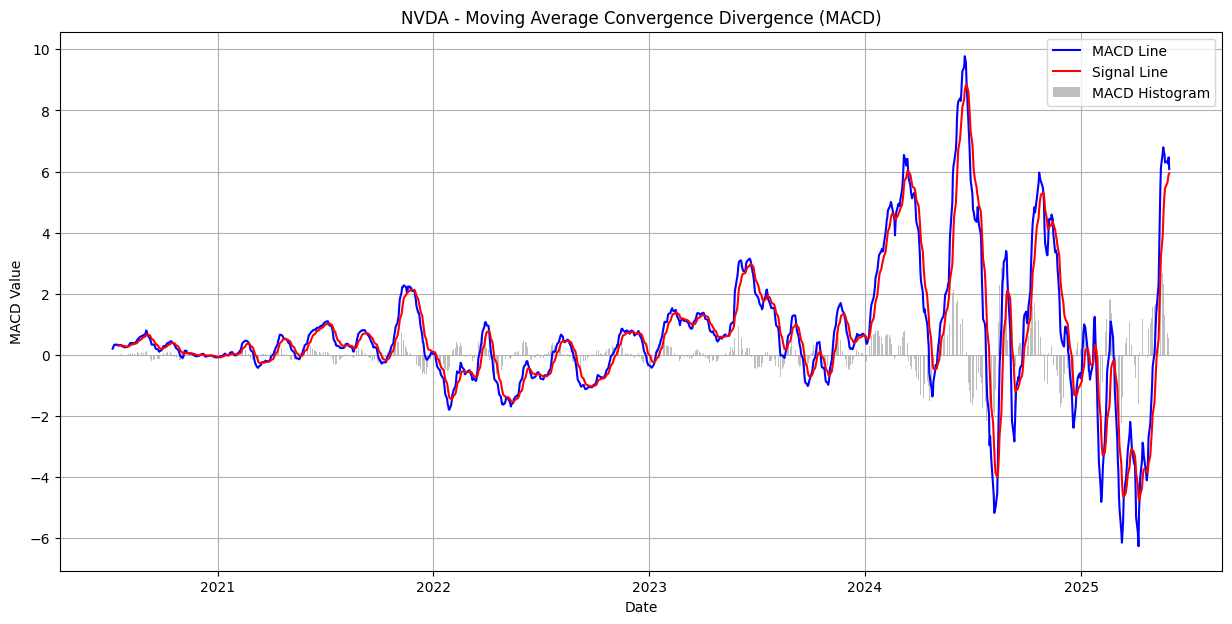

In [11]:
#Plot and save MACD
plt.figure(figsize=(15, 7))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD Line', color='blue')
plt.plot(stock_data.index, stock_data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(stock_data.index, stock_data['MACD_Diff'], label='MACD Histogram', color='gray', alpha=0.5)

#plot properties
plt.title(f'{stock} - Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)

#select plot directory and plot name to save plot
plot_folder = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'plot images/historical price plot'

plot_name = f'{stock} - Moving Average Convergence Divergence (MACD).png'
plot_path = os.path.join(plot_folder, plot_name)

#create the directory if it doesn't exist
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

#save plot and display message
plt.savefig(plot_path)
print(f'\nPlot is saved.\n')

#show plot
plt.show()

#close the plot to free up memory
plt.close()

# PyNance for Financial Metrics